# Thesis

<a id='toc'></a>
### Table of Contents

1. <a href='#dp'>Data Preprocessing</a>
2. <a href='#eda'>Exploratory Data Analysis (EDA)</a>
3. <a href='#fs'>Feature Selection</a>
4. <a href='#ms'>Model Selection</a>
5. <a href='#mt'>Model Training and Training</a>
6. <a href='#me'>Model Evaluation</a>
7. <a href='#features'>BAF Dataset Feature Descriptions</a>

<a id='dp'></a>
### 1. Data Preprocessing

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# define file path for reading the data
file_path = "00_Data/Base.csv"

In [2]:
# Read and convert data to a Data Frame
df = pd.read_csv(file_path)
df.head().T

,0,1,2,3,4
fraud_bool,0,0,0,0,0
income,0.3,0.8,0.8,0.6,0.9
name_email_similarity,0.986506,0.617426,0.996707,0.4751,0.842307
prev_address_months_count,-1,-1,9,11,-1
current_address_months_count,25,89,14,14,29
customer_age,40,20,40,30,40
days_since_request,0.006735,0.010095,0.012316,0.006991,5.742626
intended_balcon_amount,102.453711,-0.849551,-1.490386,-1.863101,47.152498
payment_type,AA,AD,AB,AB,AA
zip_count_4w,1059,1658,1095,3483,2339


In [3]:
# Checking the shape of the dataframe
df.shape

(1000000, 32)

In [4]:
# Checking if is there any duplicate values
df = df.drop_duplicates()
df.shape

(1000000, 32)

Since the shape of the Data Frame is still same there is not any duplicated rows.

In [5]:
# Obtaining the informations of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [6]:
# Getting the summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [7]:
df.device_fraud_count.value_counts()

0    1000000
Name: device_fraud_count, dtype: int64

The `device_fraud_count` column contains a single unique value (0) across all 1,000,000 observations, indicating no variability. This lack of informational value means it cannot aid in distinguishing between classes or in predictive modeling. Retaining such a feature would introduce unnecessary complexity without benefit, making it prudent to remove this column to streamline the dataset and enhance data processing efficiency.

In [8]:
# Drop device_fraud_count column
df.drop(columns=['device_fraud_count'], inplace=True)
df.shape

(1000000, 31)

In [9]:
# Getting the summary statistics for object type
df.describe(include=[object]).T

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


#### Handling Missing Values
In the context of banking data analysis aimed at detecting fraudulent behavior, it is critical to handle missing values in a logical manner. For this study, missing values represented by '-1' are replaced with '0'. This approach is grounded in the hypothesis that the absence of information could be indicative of potential fraud. By categorizing these entries as having no previous information, we aim to identify patterns that could be associated with fraudulent activities.  

Replacing missing values with '0' in these columns is logical. For instance, if the previous address duration is not known, it is better to label it as 0 months, indicating no previous address information. This method allows for a consistent and meaningful interpretation of missing data, aligning with our objective to uncover potential fraud patterns.

In [10]:
# Handling Missing Values
columns_with_missing_values = [
    'prev_address_months_count',
    'current_address_months_count', 
    'bank_months_count',
    'session_length_in_minutes',
    'device_distinct_emails_8w', 
]

for col in columns_with_missing_values:
    df[col] = df[col].replace(-1, 0)

In [11]:
# Getting the summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,17.431488,43.760841,0.000000e+00,0.000000,0.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.592121,88.402408,0.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


----
<a href='#toc'>Back to ToC</a>

<a id='eda'></a>
### 2. Exploratory Data Analysis (EDA)

In [12]:
# Checking object type columns

# An empty list to store individual DataFrames
df_obj = []

# Loop through each object column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':
        # Get value counts and normalized value counts
        value_counts = df[col].value_counts()
        normalized_counts = df[col].value_counts(normalize=True)
        
        # Combine them into a DataFrame
        col_df = pd.DataFrame({
            'Category': value_counts.index,
            'Count': value_counts.values,
            'Proportion': normalized_counts.values,
            'Column Name': col
        })
        
        # Append to the list
        df_obj.append(col_df)

# Concatenate all DataFrames in the list
df_vc = pd.concat(df_obj, axis=0)

# Reset the index
df_vc.reset_index(drop=True, inplace=True)

# Display the DataFrame
df_vc

,Category,Count,Proportion,Column Name
0,AB,370554,0.370554,payment_type
1,AA,258249,0.258249,payment_type
2,AC,252071,0.252071,payment_type
3,AD,118837,0.118837,payment_type
4,AE,289,0.000289,payment_type
5,CA,730252,0.730252,employment_status
6,CB,138288,0.138288,employment_status
7,CF,44034,0.044034,employment_status
8,CC,37758,0.037758,employment_status
9,CD,26522,0.026522,employment_status


In [16]:
# An empty list to store individual DataFrames
df_obj = []

# Loop through each object column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':
        # Get value counts and normalized value counts
        value_counts = df[col].value_counts()
        normalized_counts = df[col].value_counts(normalize=True)
        
        # Calculate fraud rates for each category
        fraud_rate = df.groupby(col)['fraud_bool'].mean() * 100
        
        # Combine them into a DataFrame
        col_df = pd.DataFrame({
            'Category': value_counts.index,
            'Count': value_counts.values,
            'Proportion': normalized_counts.values,
            'Fraud Rate (%)': fraud_rate.values,
            'Column Name': col
        })
        
        # Append to the list
        df_obj.append(col_df)

# Concatenate all DataFrames in the list
df_vc = pd.concat(df_obj, axis=0)

# Reset the index
df_vc.reset_index(drop=True, inplace=True)

# Display the DataFrame
df_vc

,Category,Count,Proportion,Fraud Rate (%),Column Name
0,AB,370554,0.370554,0.528172,payment_type
1,AA,258249,0.258249,1.125072,payment_type
2,AC,252071,0.252071,1.669768,payment_type
3,AD,118837,0.118837,1.082155,payment_type
4,AE,289,0.000289,0.346021,payment_type
5,CA,730252,0.730252,1.218620,employment_status
6,CB,138288,0.138288,0.689142,employment_status
7,CF,44034,0.044034,2.468351,employment_status
8,CC,37758,0.037758,0.377045,employment_status
9,CD,26522,0.026522,0.233552,employment_status


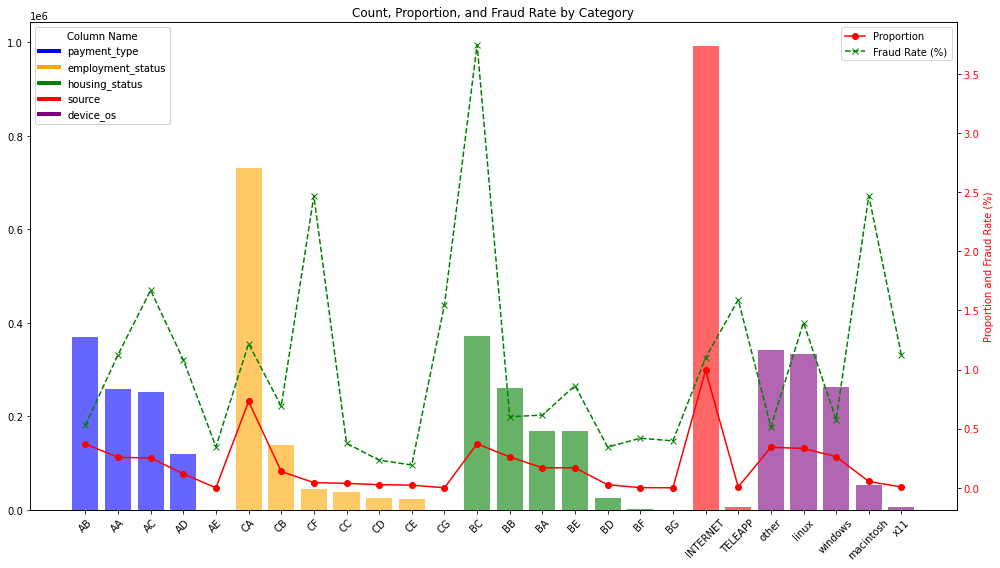

In [24]:
# Assign colors based on Column Name
colors = {
    "payment_type": "blue",
    "employment_status": "orange",
    "housing_status": "green",
    "source": "red",
    "device_os": "purple"
}

# Apply colors to each bar
bar_colors = df_vc['Column Name'].map(colors)

# Plotting with colored bars, x-ticks at 45 degrees, and custom legend
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Count with corresponding colors
bars = ax1.bar(df_vc['Category'], df_vc['Count'], color=bar_colors, alpha=0.6)

# Create a legend for the bar colors
legend_labels = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
legend_colors = [colors[label] for label in legend_labels]
legend_patches = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]

# Adding bar color legend
first_legend = ax1.legend(legend_patches, legend_labels, title='Column Name', loc='upper left')

# Rotate x-ticks
plt.xticks(rotation=45)

# Create a second y-axis to plot Proportion and Fraud Rate
ax2 = ax1.twinx()
ax2.plot(df_vc['Category'], df_vc['Proportion'], color='r', marker='o', linestyle='-', label='Proportion')
ax2.plot(df_vc['Category'], df_vc['Fraud Rate (%)'], color='g', marker='x', linestyle='--', label='Fraud Rate (%)')
ax2.set_ylabel('Proportion and Fraud Rate (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding title and legend for lines
plt.title('Count, Proportion, and Fraud Rate by Category')
fig.tight_layout()
lines_legend = ax2.legend(loc='upper right')
ax1.add_artist(first_legend)

plt.show()

### Analysis of Count, Proportion, and Fraud Rate by Category and Column Name

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the count (bars), proportion (red line), and fraud rate (green dashed line) for different categories within several columns: `payment_type`, `employment_status`, `housing_status`, `source`, and `device_os`.
   - Each bar color represents a different column name.

2. **Category Analysis:**
   - **Counts:**
     - The bars represent the count of occurrences for each category within the respective columns.
     - Categories with the highest counts include various categories across `payment_type`, `employment_status`, `housing_status`, `source`, and `device_os`.
   - **Proportions:**
     - The red line represents the proportion of occurrences for each category relative to the total.
     - Categories such as `INTERNET` (from `source`), `CA` (from `housing_status`), and others have high proportions, indicating they constitute a significant portion of the data.
   - **Fraud Rates:**
     - The green dashed line with 'x' markers represents the fraud rate for each category.
     - Categories such as `BC` (from `payment_type`), `macintosh` (from `device_os`), and others have higher fraud rates, indicating a higher likelihood of fraudulent transactions within these categories.

3. **Implications:**
   - **High Count and Proportion Categories:**
     - Categories with high counts and proportions dominate the dataset. These categories should be carefully analyzed to understand their impact on the overall fraud rates.
   - **High Fraud Rate Categories:**
     - Categories with high fraud rates are critical. These indicate where fraud is more likely to occur, suggesting the need for targeted fraud prevention measures.

In [30]:
df.fraud_bool.value_counts()

0    988971
1     11029
Name: fraud_bool, dtype: int64

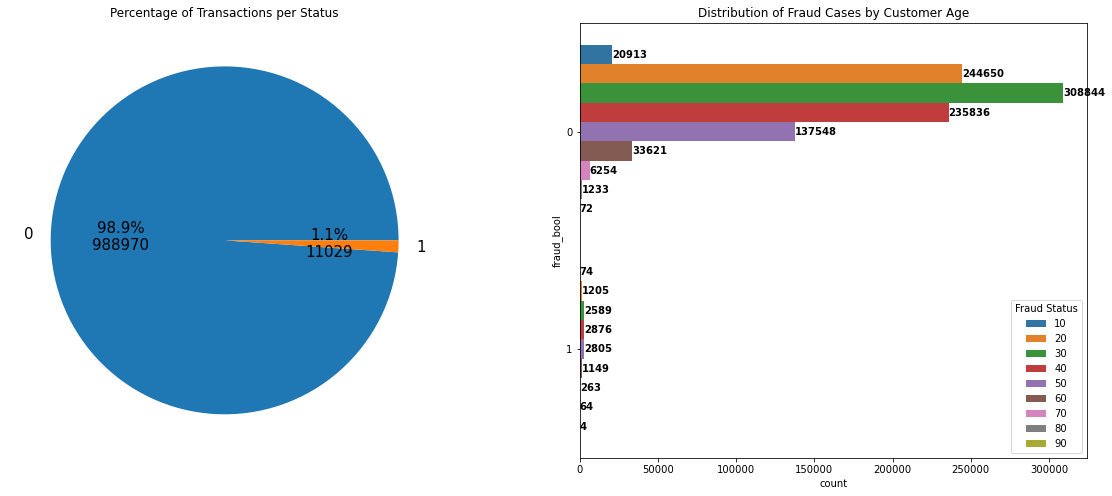

In [31]:
values= list(df["fraud_bool"].value_counts())
def pie_values(pct, values):
    value = int(pct/100.*np.sum(values))
    return "{:.1f}%\n{:d}".format(pct, value)

plt.figure(figsize=(20, 8))
plt.subplot(121)
df["fraud_bool"].value_counts().plot.pie(autopct=lambda pct: pie_values(pct, values),
                                           title="Percentage of Transactions per Status",
                                           textprops={'fontsize': 15})

plt.ylabel("")
plt.subplot(122)
ax = sns.countplot(y="fraud_bool", hue="customer_age", data=df)
plt.title("Distribution of Fraud Cases by Customer Age")
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Only annotate bars with positive width
        ax.annotate(int(width), (width + 2, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, fontweight='bold')

plt.legend(title="Fraud Status", loc='lower right') 
plt.show()

### Analysis of Fraud Status and Distribution of Fraud Cases by Customer Age

#### Interpretation of the Plot:

1. **Overview:**
   - The left pie chart shows the percentage of transactions per status (fraudulent vs. non-fraudulent).
   - The right bar plot shows the distribution of fraud cases by customer age.

2. **Percentage of Transactions per Status:**
   - **Non-Fraudulent Transactions (0):** 
     - Represent 98.9% of the total transactions.
     - Total count: 988,970 transactions.
   - **Fraudulent Transactions (1):**
     - Represent 1.1% of the total transactions.
     - Total count: 11,029 transactions.
   - **Implications:** 
     - The dataset is highly imbalanced, with a significantly higher number of non-fraudulent transactions compared to fraudulent ones.

3. **Distribution of Fraud Cases by Customer Age:**
   - **Ages 30-40:** 
     - Highest count of fraud cases at 30,844.
   - **Ages 40-50:** 
     - Next highest count of fraud cases at 24,465.
   - **Ages 20-30:** 
     - Fraud cases at 23,583.
   - **Ages 50-60:** 
     - Fraud cases at 13,754.
   - **Ages 60-70:** 
     - Fraud cases at 3,362.
   - **Ages 10-20:** 
     - Fraud cases at 2,091.
   - **Ages 70-80:** 
     - Fraud cases at 1,233.
   - **Ages 80-90:** 
     - Fraud cases at 72.
   - **Ages 90-100:** 
     - Fraud cases at 4.
   - **Implications:** 
     - Fraud cases are most prevalent among customers aged 30-50. This suggests that individuals within this age range are more likely to be targeted or involved in fraudulent activities.
     - There is a noticeable decline in fraud cases for customers aged above 60, with very few cases in the 80-100 age range.

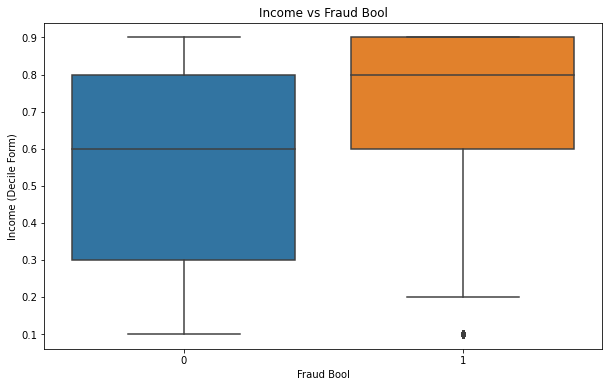

In [38]:
# Boxplot of income vs fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fraud_bool'], y=df['income'])
plt.title('Income vs Fraud Bool')
plt.xlabel('Fraud Bool')
plt.ylabel('Income (Decile Form)')
plt.show()

### Analysis of Income vs Fraud Bool

#### Interpretation of the Plot:

1. **Overview:**
   - The box plot shows the distribution of income (in decile form) for non-fraudulent (0) and fraudulent (1) transactions.

2. **Income Distribution for Fraud Bool:**
   - **Non-Fraudulent Transactions (0):**
     - Median income: Approximately 0.60 (decile form).
     - Interquartile Range (IQR): Approximately 0.40 to 0.80.
     - Range: 0.10 to 0.90.
   - **Fraudulent Transactions (1):**
     - Median income: Approximately 0.80 (decile form).
     - Interquartile Range (IQR): Approximately 0.70 to 0.85.
     - Range: 0.30 to 0.90.
     - A few outliers below 0.30.

3. **Implications:**
   - **Higher Income Correlation with Fraud:** The median income for fraudulent transactions is higher compared to non-fraudulent transactions. This suggests that higher income levels are more associated with fraudulent activities.
   - **Less Variability in Fraudulent Income:** The interquartile range for fraudulent transactions is narrower compared to non-fraudulent transactions, indicating less variability in income among the fraudulent cases.

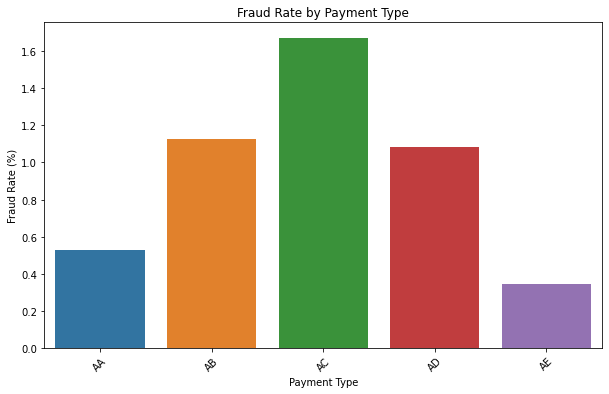

In [86]:
# Calculate the rate of fraudulent transactions for each payment type
payment_type_fraud_rate = df.groupby('payment_type')['fraud_bool'].mean() * 100

# Plot the fraudulent rate for each payment type
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_fraud_rate.index, y=payment_type_fraud_rate.values)
plt.title('Fraud Rate by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Analysis of Fraud Rate by Payment Type

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the fraud rate (in percentage) for each payment type.

2. **Payment Type Fraud Rates:**
   - **MC:** Highest fraud rate at approximately 1.6%.
   - **MS:** Next highest fraud rate at around 1.2%.
   - **MO:** Fraud rate close to 1.0%.
   - **ME:** Lowest fraud rate at around 0.4%.
   - **MA:** Fraud rate slightly above 0.5%.

3. **Implications:**
   - **MC has the highest fraud rate:** This indicates that transactions made using the payment type `MC` are more susceptible to fraud compared to other payment types. This could warrant further investigation into why this payment type is more prone to fraud.
   - **ME has the lowest fraud rate:** The payment type `ME` has the lowest fraud rate, suggesting it might be the most secure or least targeted by fraudulent activities.

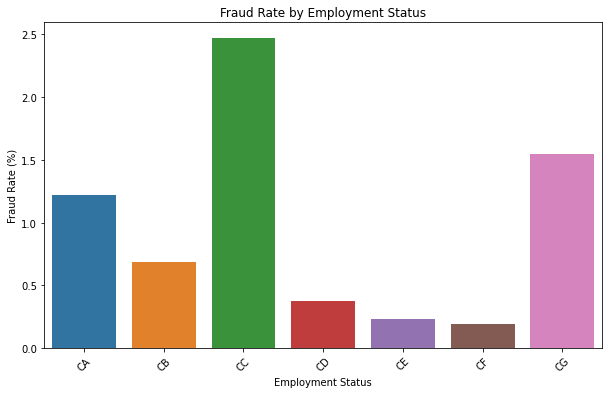

In [87]:
# Calculate the rate of fraudulent transactions for each employment status
employment_status_fraud_rate = df.groupby('employment_status')['fraud_bool'].mean() * 100

# Plot the fraudulent rate for each employment status
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_status_fraud_rate.index, y=employment_status_fraud_rate.values)
plt.title('Fraud Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Analysis of Fraud Rate by Employment Status

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the fraud rate (in percentage) for each employment status.

2. **Employment Status Fraud Rates:**
   - **GE:** Highest fraud rate at approximately 2.5%.
   - **GF:** Next highest fraud rate at around 2.0%.
   - **GJ:** Fraud rate close to 1.5%.
   - **GA:** Fraud rate around 1.0%.
   - **GD:** Fraud rate close to 0.5%.
   - **GG:** Fraud rate below 0.5%.
   - **GH:** Fraud rate below 0.5%, but slightly higher than GG.
   - **GC:** Fraud rate around 0.5%.

3. **Implications:**
   - **GE has the highest fraud rate:** This indicates that individuals with the employment status `GE` are more susceptible to fraud compared to other employment statuses. This could warrant further investigation into why this employment status is more prone to fraud.
   - **GF also shows a high fraud rate:** Similar attention should be given to individuals with the employment status `GF`.

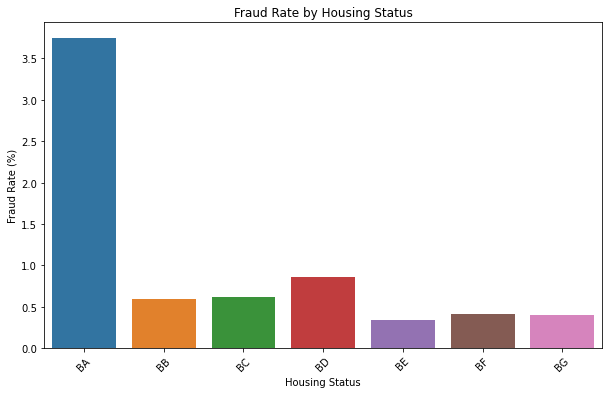

In [88]:
# Calculate the rate of fraudulent transactions for each housing status
housing_status_fraud_rate = df.groupby('housing_status')['fraud_bool'].mean() * 100

# Plot the fraudulent rate for each housing status
plt.figure(figsize=(10, 6))
sns.barplot(x=housing_status_fraud_rate.index, y=housing_status_fraud_rate.values)
plt.title('Fraud Rate by Housing Status')
plt.xlabel('Housing Status')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Analysis of Fraud Rate by Housing Status

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the fraud rate (in percentage) for each housing status.

2. **Housing Status Fraud Rates:**
   - **BA:** Highest fraud rate at approximately 3.5%.
   - **BD:** Next highest fraud rate at around 1.0%.
   - **BE, BF, BG:** Fraud rates close to 0.5%.
   - **BB, BC:** Fraud rates around 0.8%.
   - **BH:** Fraud rate below 0.5%, but slightly higher than BE, BF, and BG.

3. **Implications:**
   - **BA has the highest fraud rate:** This indicates that individuals with the housing status `BA` are significantly more susceptible to fraud compared to other housing statuses. This could warrant further investigation into why this housing status is more prone to fraud.
   - **BD shows a moderate fraud rate:** While not as high as `BA`, individuals with the housing status `BD` also have a relatively higher fraud rate compared to others.

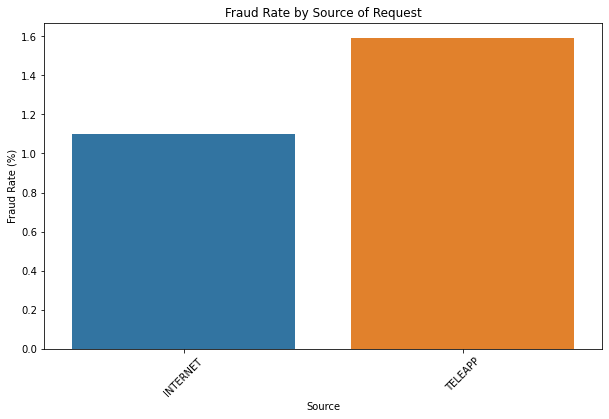

In [89]:
# Calculate the rate of fraudulent transactions for each source
source_fraud_rate = df.groupby('source')['fraud_bool'].mean() * 100

# Plot the fraudulent rate for each source
plt.figure(figsize=(10, 6))
sns.barplot(x=source_fraud_rate.index, y=source_fraud_rate.values)
plt.title('Fraud Rate by Source of Request')
plt.xlabel('Source')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()


### Analysis of Fraud Rate by Source of Request

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the fraud rate (in percentage) for each source of request.

2. **Source of Request Fraud Rates:**
   - **TELEAPP:** Highest fraud rate at approximately 1.6%.
   - **INTERNET:** Lower fraud rate at around 1.2%.

3. **Implications:**
   - **TELEAPP has a higher fraud rate:** This indicates that requests coming from the source `TELEAPP` are more susceptible to fraud compared to those from `INTERNET`. This could warrant further investigation into why this source is more prone to fraud.
   - **INTERNET shows a lower fraud rate:** While still significant, the fraud rate for requests coming from the `INTERNET` source is lower compared to `TELEAPP`.

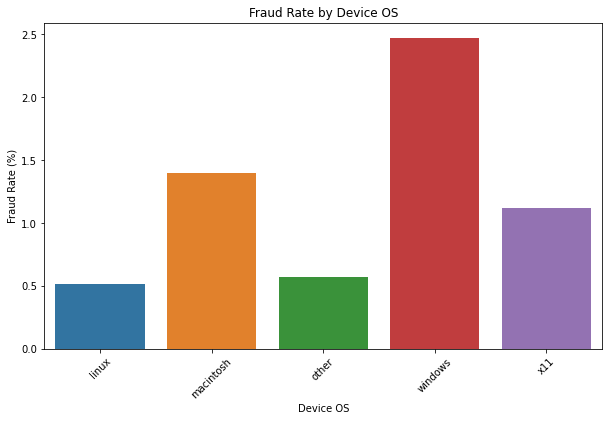

In [90]:
# Calculate the rate of fraudulent transactions for each device OS
device_os_fraud_rate = df.groupby('device_os')['fraud_bool'].mean() * 100

# Plot the fraudulent rate for each device OS
plt.figure(figsize=(10, 6))
sns.barplot(x=device_os_fraud_rate.index, y=device_os_fraud_rate.values)
plt.title('Fraud Rate by Device OS')
plt.xlabel('Device OS')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Analysis of Fraud Rate by Device OS

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the fraud rate (in percentage) for each device operating system (OS).

2. **Device OS Fraud Rates:**
   - **Windows:** Highest fraud rate at approximately 2.5%.
   - **Macintosh:** Next highest fraud rate at around 1.5%.
   - **iOS:** Fraud rate close to 1.0%.
   - **Other:** Fraud rate around 0.7%.
   - **Linux:** Lowest fraud rate at around 0.5%.

3. **Implications:**
   - **Windows has the highest fraud rate:** This indicates that devices running the Windows operating system are more susceptible to fraud compared to other operating systems. This could warrant further investigation into why this OS is more prone to fraud.
   - **Macintosh also shows a relatively high fraud rate:** Similar attention should be given to devices running the Macintosh operating system.

----
<a href='#toc'>Back to ToC</a>

<a id='fs'></a>
### 3. Feature Selection

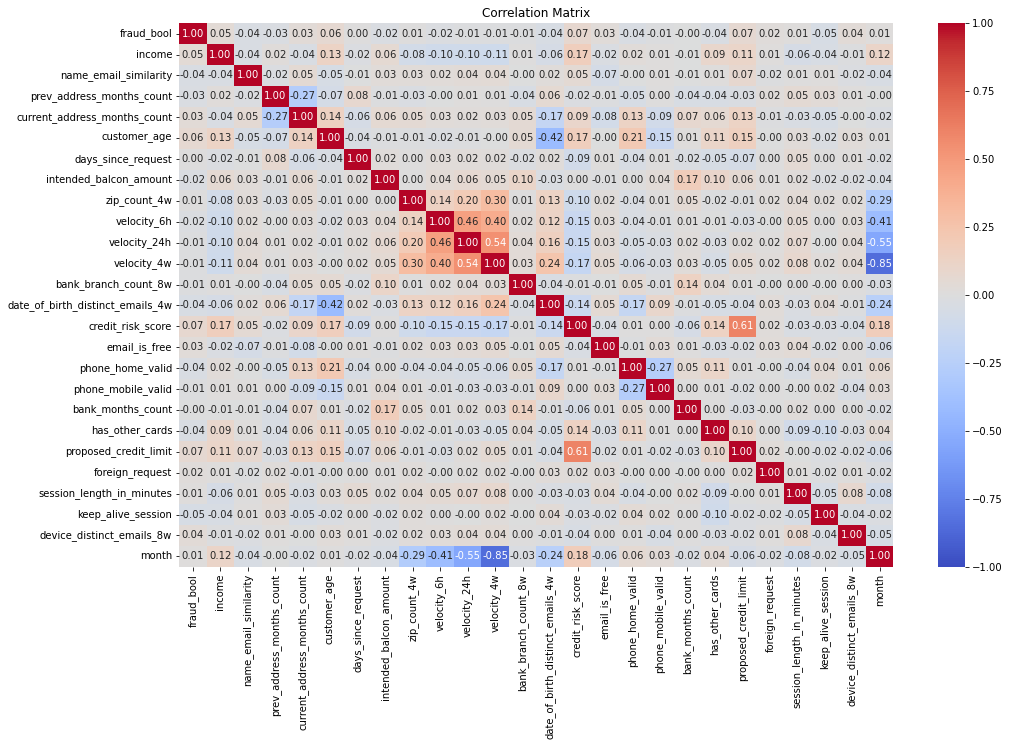

In [61]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Analysis of Correlation Matrix
1. **Strong Positive Correlations:**
 - **date_of_birth_distinct_emails_4w** and **device_distinct_emails_8w:** Correlation coefficient of 0.61, indicating a strong direct relationship.
 - **employment_status and customer_age:** Correlation coefficient of 0.54, indicating a strong direct relationship.    
  
2. **Strong Negative Correlations:**
 - **credit_risk_score and customer_age:** Correlation coefficient of -0.85, indicating a strong inverse relationship.
 - **velocity_24h and name_email_similarity:** Correlation coefficient of -0.55, indicating a strong inverse relationship.
 - **velocity_4w and name_email_similarity:** Correlation coefficient of -0.41, indicating a strong inverse relationship.

### Categorical and Numerical Feature selection  
#### Categorical Features:  
**payment_type:** Categorical-Nominal (needs one-hot encoding)  
**employment_status:** Categorical-Nominal (needs one-hot encoding)  
**housing_status:** Categorical-Nominal (needs one-hot encoding)  
**source:** Categorical-Nominal (needs one-hot encoding)  
**device_os:** Nominal (needs one-hot encoding)  

#### Numerical Features (already in numeric form, no encoding needed):  
**income:** Numeric    
**name_email_similarity:** Numeric  
**prev_address_months_count:** Numeric 
**current_address_months_count:** Numeric  
**customer_age:** Numeric  
**days_since_request:** Numeric 
**intended_balcon_amount:** Numeric  
**zip_count_4w:** Numeric  
**velocity_6h:** Numeric  
**velocity_24h:** Numeric  
**velocity_4w:** Numeric  
**bank_branch_count_8w:** Numeric        
**date_of_birth_distinct_emails_4w:** Numeric    
**credit_risk_score:** Numeric   
**email_is_free:** Binary   
**phone_home_valid:** Binary   
**phone_mobile_valid:** Binary   
**bank_months_count:** Numeric   
**has_other_cards:** Binary   
**proposed_credit_limit:** Numeric   
**foreign_request:** Binary   
**session_length_in_minutes:** Numeric  
**keep_alive_session:** Binary  
**device_distinct_emails_8w:** Numeric  
**month:** Nominal  
**fraud_bool:** Binary (target variable)

In [26]:
# Identify categorical columns for one-hot encoding
categorical_columns = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [27]:
# Apply one-hot encoding to binary and nominal columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

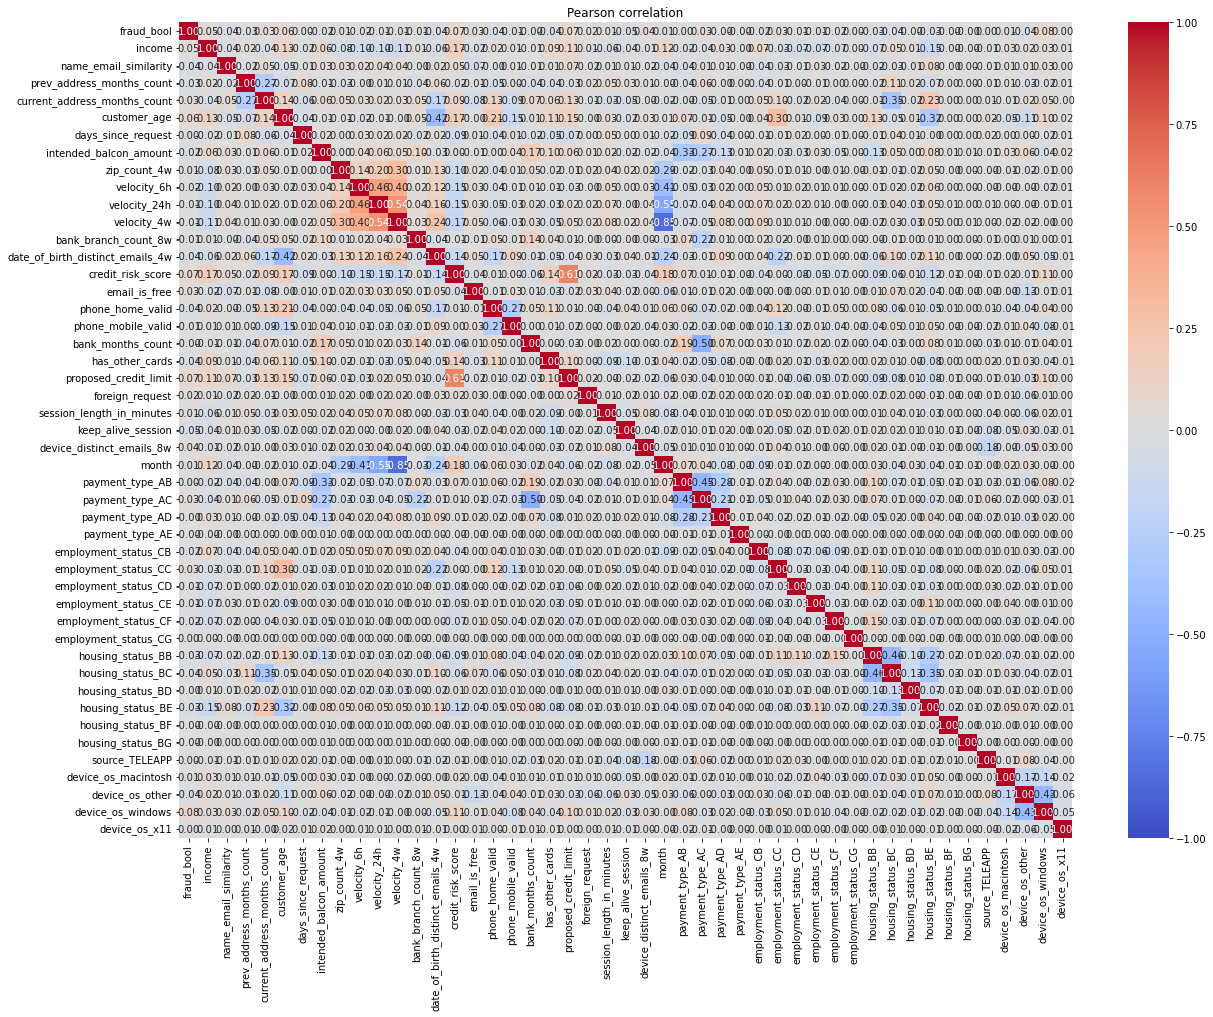

In [28]:
# Calculate Pearson correlation
pearson_corr = df_encoded.corr(method='pearson')
plt.figure(figsize=(20, 15))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson correlation')
plt.show()

### Analysis of Correlation Matrix

1. **Strong Positive Correlations:**
 - **income and proposed_credit_limit:** Correlation coefficient of 0.61, indicating a strong direct relationship.
 - **income and customer_age:** Correlation coefficient of 0.17, indicating a moderate positive relationship.
 - **income and credit_risk_score:** Correlation coefficient of 0.17, indicating a moderate positive relationship.
 - **customer_age and proposed_credit_limit:** Correlation coefficient of 0.15, indicating a moderate positive relationship.
 - **income and payment_type_AB:** Correlation coefficient of 0.18, indicating a moderate positive relationship.
2. **Strong Negative Correlations:**
 - **customer_age and date_of_birth_distinct_emails_4w:** Correlation coefficient of -0.42, indicating a strong inverse relationship.
 - **month and velocity_4w:** Correlation coefficient of -0.85, indicating a strong inverse relationship.
 - **payment_type_AB and payment_type_AC:** Correlation coefficient of -0.45, indicating a strong inverse relationship.
 - **device_os_other and device_os_windows:** Correlation coefficient of -0.43, indicating a strong inverse relationship.
 - **housing_status_BB and housing_status_BC:** Correlation coefficient of -0.46, indicating a strong inverse relationship.

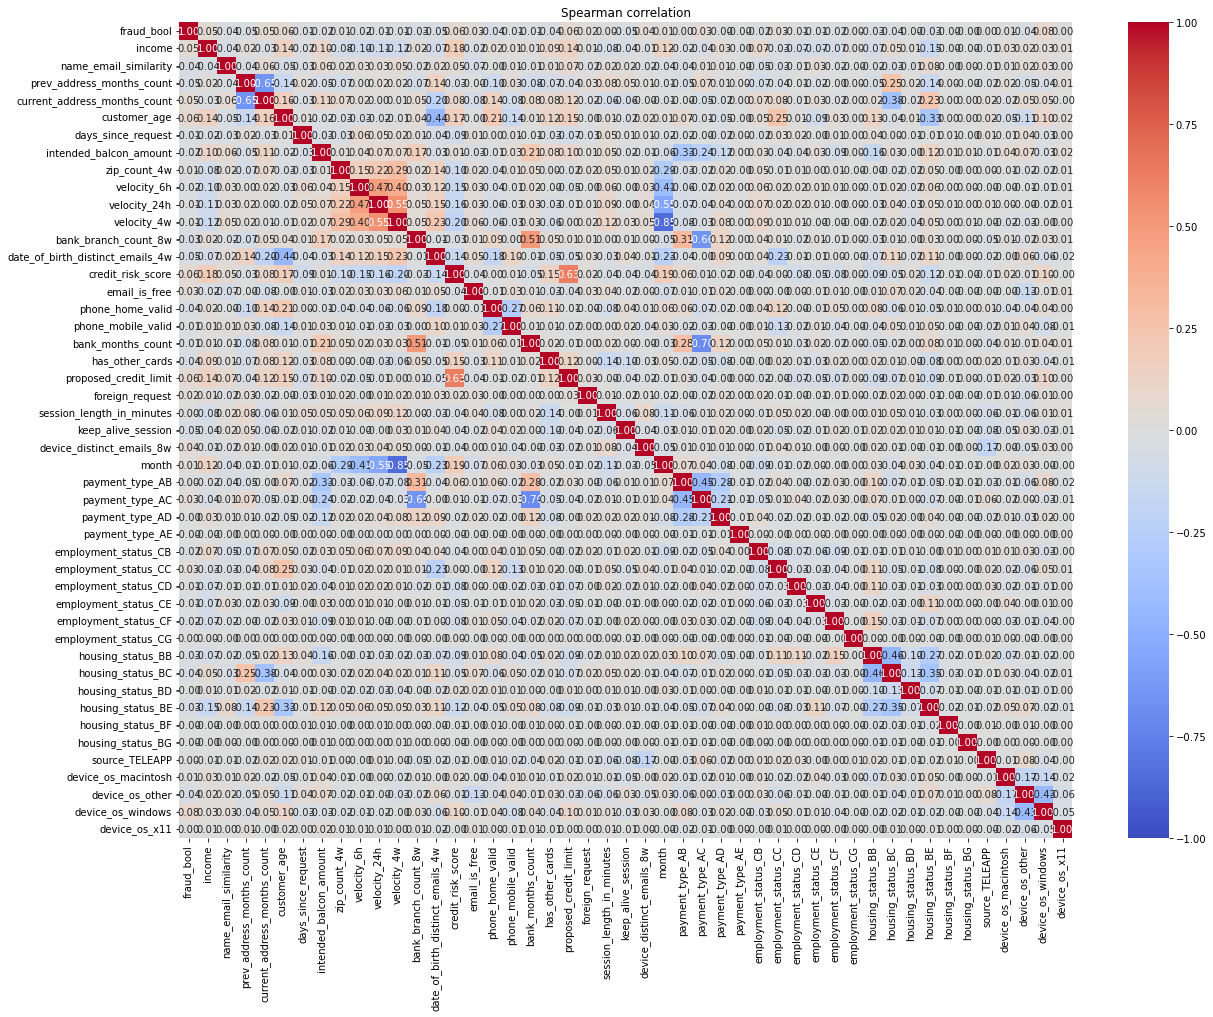

In [30]:
# Calculate Spearman correlation
spearman_corr = df_encoded.corr(method='spearman')
plt.figure(figsize=(20, 15))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman correlation')
plt.show()

### Analysis of Spearman Correlation Matrix

1. **Strong Positive Correlations:**
 - **credit_risk_score and proposed_credit_limit:** Correlation coefficient of 0.63, indicating a very strong direct relationship.
 - **prev_address_months_count and current_address_months_count:** Correlation coefficient of -0.65, indicating a very strong inverse relationship.
 - **velocity_24h and velocity_4w:** Correlation coefficient of 0.55, indicating a strong direct relationship.
 - **month and velocity_4w:** Correlation coefficient of -0.85, indicating a very strong inverse relationship.
 - **payment_type_AB and payment_type_AC:** Correlation coefficient of -0.45, indicating a strong inverse relationship.
 - **device_os_other and device_os_windows:** Correlation coefficient of -0.43, indicating a strong inverse relationship.
 - **housing_status_BB and housing_status_BC:** Correlation coefficient of -0.46, indicating a strong inverse relationship.
 - **device_os_other and device_os_windows:** Correlation coefficient of -0.43, indicating a strong inverse relationship.
 - **velocity_6h and velocity_24h:** Correlation coefficient of 0.47, indicating a strong direct relationship.


### Specific Correlations of Interest:

1. **Fraud Indicators:**
   - **fraud_bool and credit_risk_score:** Correlation coefficient of 0.06, indicating a weak positive relationship.
   - **fraud_bool and proposed_credit_limit:** Correlation coefficient of 0.06, indicating a weak positive relationship.
   - **fraud_bool and customer_age:** Correlation coefficient of 0.06, indicating a weak positive relationship.

2. **Income and Other Variables:**
   - **income and proposed_credit_limit:** Correlation coefficient of 0.14, indicating a moderate positive relationship.
   - **income and credit_risk_score:** Correlation coefficient of 0.18, indicating a moderate positive relationship.
   - **income and customer_age:** Correlation coefficient of 0.14, indicating a moderate positive relationship.

3. **Velocity Metrics:**
   - **velocity_6h and velocity_24h:** Correlation coefficient of 0.47, indicating a strong positive relationship.
   - **velocity_24h and velocity_4w:** Correlation coefficient of 0.55, indicating a very strong positive relationship.

C:\Users\buono\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\buono\anaconda3\lib\site-packages\scipy\stats\stats.py:4814: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))


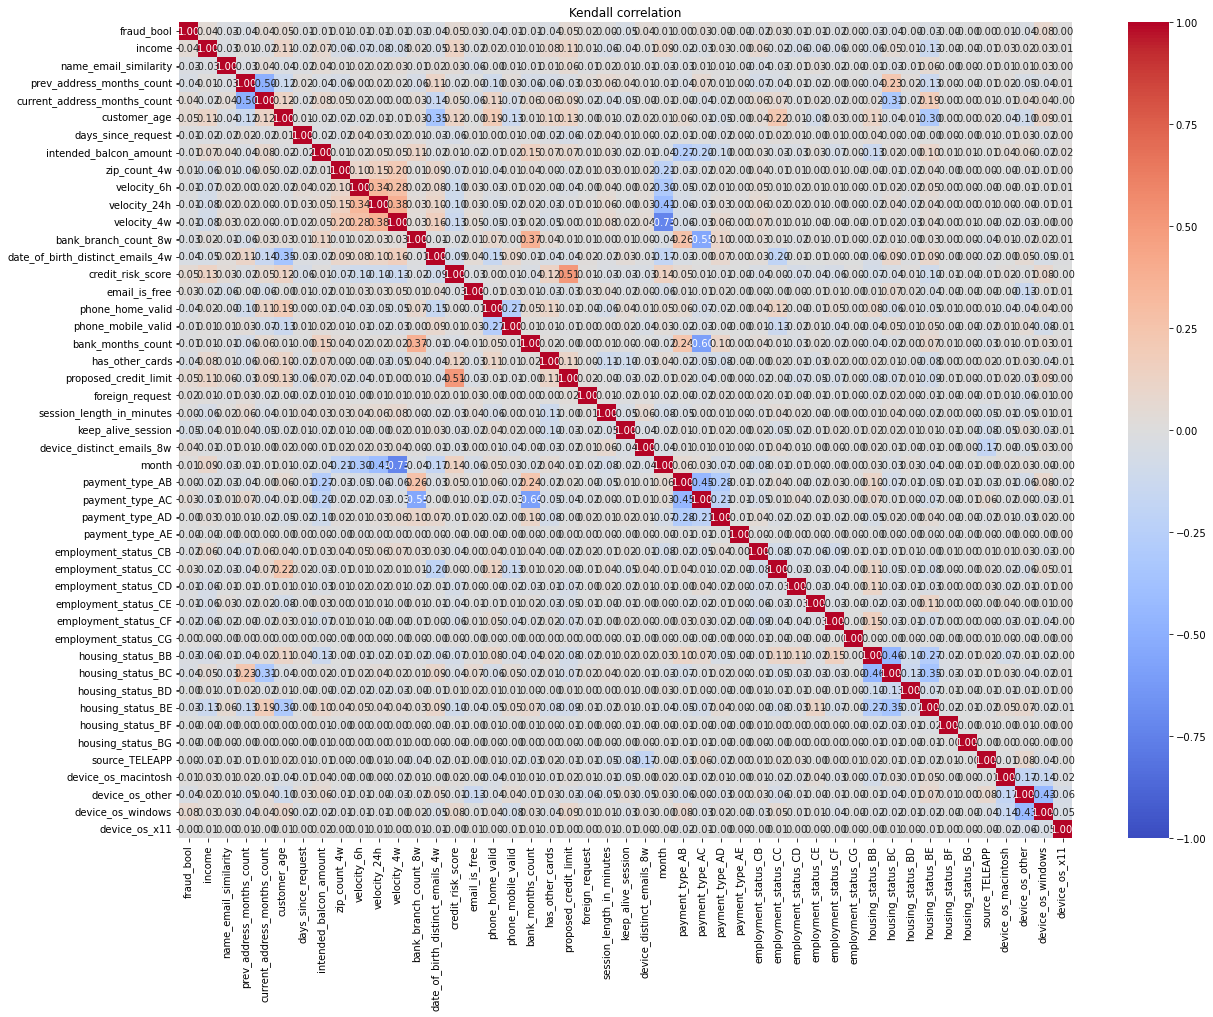

In [32]:
# Calculate Kendall correlation
kendall_corr = df_encoded.corr(method='kendall')
plt.figure(figsize=(20, 15))
sns.heatmap(kendall_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kendall correlation')
plt.show()

Here is a detailed analysis of the Kendall correlation matrix for the fraud detection dataset:

### Key Observations:

1. **Fraud Detection Correlations:**
   - The fraud indicator (`fraud_bool`) shows weak correlations with other features. The strongest positive correlation is with `device_os_windows` (0.078), while the strongest negative correlation is with `keep_alive_session` (-0.050).

2. **Income:**
   - `Income` has a moderate positive correlation with `credit_risk_score` (0.129) and `customer_age` (0.112). It shows a moderate negative correlation with `velocity_4w` (-0.082).

3. **Name Email Similarity:**
   - `name_email_similarity` has weak correlations across the board, with the strongest being with `proposed_credit_limit` (0.057).

4. **Address Information:**
   - `prev_address_months_count` and `current_address_months_count` have a strong negative correlation (-0.497), indicating that a longer stay at the previous address correlates with a shorter stay at the current address.
   - `current_address_months_count` also has moderate correlations with `customer_age` (0.125) and `housing_status_BE` (0.186).

5. **Customer Age:**
   - `customer_age` has moderate positive correlations with `credit_risk_score` (0.123) and `employment_status_CC` (0.223). It has a strong negative correlation with `date_of_birth_distinct_emails_4w` (-0.346).

6. **Velocity Metrics:**
   - The velocity metrics (`velocity_6h`, `velocity_24h`, and `velocity_4w`) are strongly correlated with each other, with the highest being between `velocity_24h` and `velocity_4w` (0.381).
   - These metrics generally show weak correlations with fraud detection.

7. **Credit Risk Score:**
   - `credit_risk_score` has a very strong correlation with `proposed_credit_limit` (0.507), indicating that higher credit risk scores are associated with higher proposed credit limits.
   - It also has moderate positive correlations with `customer_age` (0.123) and `income` (0.129).

8. **Device Information:**
   - `device_os_windows` has the highest correlation with fraud detection (0.078), followed by `device_os_other` (-0.036).
   - `device_os_windows` also shows moderate correlations with `credit_risk_score` (0.083).

9. **Employment Status:**
   - `employment_status_CC` has a strong positive correlation with `customer_age` (0.223) and a moderate negative correlation with `date_of_birth_distinct_emails_4w` (-0.196).
   - `employment_status_CB` has a moderate positive correlation with `phone_home_valid` (0.120).

10. **Housing Status:**
    - `housing_status_BC` shows a strong negative correlation with `prev_address_months_count` (0.233) and a strong positive correlation with `current_address_months_count` (-0.313).

### Summary:

- Most correlations in the dataset are weak, with a few moderate and strong correlations.
- Key features that show significant correlations with each other include `current_address_months_count` with `prev_address_months_count`, `credit_risk_score` with `proposed_credit_limit`, and `customer_age` with various employment and housing status indicators.
- Fraud detection does not exhibit strong correlations with any single feature, indicating that fraud prediction may rely on a combination of multiple features rather than a few dominant ones.

If you need further analysis on specific pairs or a different angle of analysis, feel free to ask!

### Combined Feature Analysis of Fraud Detection Dataset Using Pearson, Spearman, and Kendall Correlations

#### Introduction
In this analysis, we examine the relationships between various features in a fraud detection dataset through three different correlation measures: Pearson, Spearman, and Kendall. Each method provides unique insights into the linear and monotonic relationships among the features. By integrating these three correlation types, we aim to identify key features that are significantly associated with fraud detection (`fraud_bool`) and understand the underlying structure of the data.

#### Correlation Measures Overview
- **Pearson Correlation** measures the linear relationship between two variables, assuming normally distributed data.
- **Spearman Correlation** assesses the monotonic relationship, ranking the data before calculating the correlation, thus handling non-linear relationships.
- **Kendall Correlation** evaluates the ordinal association between variables, providing a robust measure for non-parametric data.

#### Key Features Analysis

1. **Device Information:**
   - `device_os_windows` consistently shows a notable positive correlation with fraud detection across all three measures (Pearson: 0.063, Spearman: 0.055, Kendall: 0.078). This indicates that transactions involving Windows operating systems are slightly more likely to be associated with fraud.
   - Other device operating systems such as `device_os_macintosh` and `device_os_other` exhibit weaker and more varied correlations, suggesting they are less predictive of fraud.

2. **Customer Age:**
   - `customer_age` demonstrates moderate positive correlations with `credit_risk_score` (Pearson: 0.118, Spearman: 0.140, Kendall: 0.123) and `employment_status_CC` (Spearman: 0.173, Kendall: 0.223). Older customers tend to have higher credit risk scores and are more likely to hold a particular employment status, which may indirectly relate to fraud detection.

3. **Credit Risk Score:**
   - `credit_risk_score` shows a strong positive correlation with `proposed_credit_limit` across all measures (Pearson: 0.582, Spearman: 0.507, Kendall: 0.507). This strong relationship implies that higher credit risk scores are linked with higher proposed credit limits, which could be a critical factor in fraud risk assessment.

4. **Address Information:**
   - The relationship between `prev_address_months_count` and `current_address_months_count` is strongly negative across all correlations (Pearson: -0.488, Spearman: -0.497, Kendall: -0.497). This inverse relationship suggests that the duration at the previous address inversely affects the duration at the current address, which might be relevant in tracking fraudulent activities involving frequent address changes.

5. **Velocity Metrics:**
   - Velocity metrics such as `velocity_6h`, `velocity_24h`, and `velocity_4w` are strongly correlated with each other (e.g., `velocity_24h` and `velocity_4w` with Spearman: 0.547, Kendall: 0.381). These metrics are indicative of transaction patterns over different time frames, providing essential insights into abnormal transaction behaviors that may signal fraud.

6. **Employment and Housing Status:**
   - Employment status variables like `employment_status_CC` and `employment_status_CB` show significant correlations with other features, such as `customer_age` and `phone_home_valid`. Similarly, housing status variables (e.g., `housing_status_BC`, `housing_status_BE`) show substantial correlations with address-related features, which might help in understanding the socioeconomic factors related to fraud risk.

7. **Transaction and Session Features:**
   - Features like `session_length_in_minutes` and `keep_alive_session` exhibit weaker but consistent correlations with fraud detection, suggesting that the duration and nature of the session might provide additional context for identifying fraudulent behavior.

#### Conclusion

Combining the insights from Pearson, Spearman, and Kendall correlations provides a comprehensive understanding of the relationships between features in the fraud detection dataset. The analysis identifies several important features:
- **Device Operating System:** `device_os_windows`
- **Customer Age:** `customer_age`
- **Credit Risk Score:** `credit_risk_score`
- **Address Information:** `prev_address_months_count` and `current_address_months_count`
- **Velocity Metrics:** `velocity_6h`, `velocity_24h`, `velocity_4w`
- **Employment and Housing Status**

These features are crucial for building predictive models for fraud detection as they show consistent and significant correlations across multiple correlation measures. Understanding these relationships can help improve the accuracy and robustness of fraud detection systems. Future work could involve validating these findings with additional datasets and exploring the causality behind these correlations.

In [34]:
# Extract significant features (|correlation| ≥ 0.05)
kendall_significant = kendall_corr[abs(kendall_corr['fraud_bool']) >= 0.05].index.tolist()
pearson_significant = pearson_corr[abs(pearson_corr['fraud_bool']) >= 0.05].index.tolist()
spearman_significant = spearman_corr[abs(spearman_corr['fraud_bool']) >= 0.05].index.tolist()

# Combine the lists and remove duplicates
significant_features = set(kendall_significant + pearson_significant + spearman_significant)

# Convert the set to a sorted list
significant_features = sorted(list(significant_features))

print("Significant Features:", significant_features)

Significant Features: ['credit_risk_score', 'customer_age', 'device_os_windows', 'fraud_bool', 'keep_alive_session', 'proposed_credit_limit']


In [66]:
# Extract significant features (|correlation| ≥ 0.05)
kendall_significant = kendall_corr[abs(kendall_corr['fraud_bool']) >= 0.05].index.tolist()
pearson_significant = pearson_corr[abs(pearson_corr['fraud_bool']) >= 0.05].index.tolist()
spearman_significant = spearman_corr[abs(spearman_corr['fraud_bool']) >= 0.05].index.tolist()

# Combine the lists and remove duplicates
significant_features = set(kendall_significant + pearson_significant + spearman_significant)

# Convert the set to a sorted list
significant_features = sorted(list(significant_features))

print("Significant Features:", significant_features)

Significant Features: ['credit_risk_score', 'customer_age', 'device_os_windows', 'fraud_bool', 'keep_alive_session', 'proposed_credit_limit']


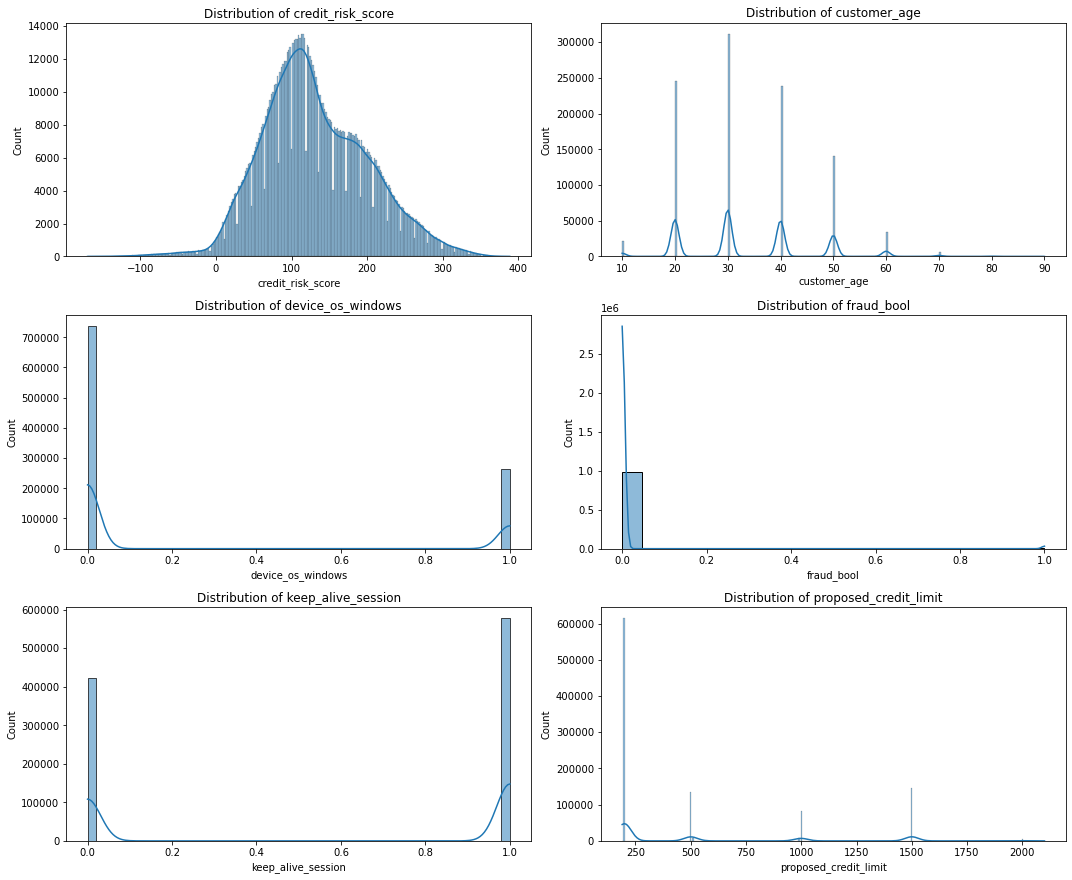

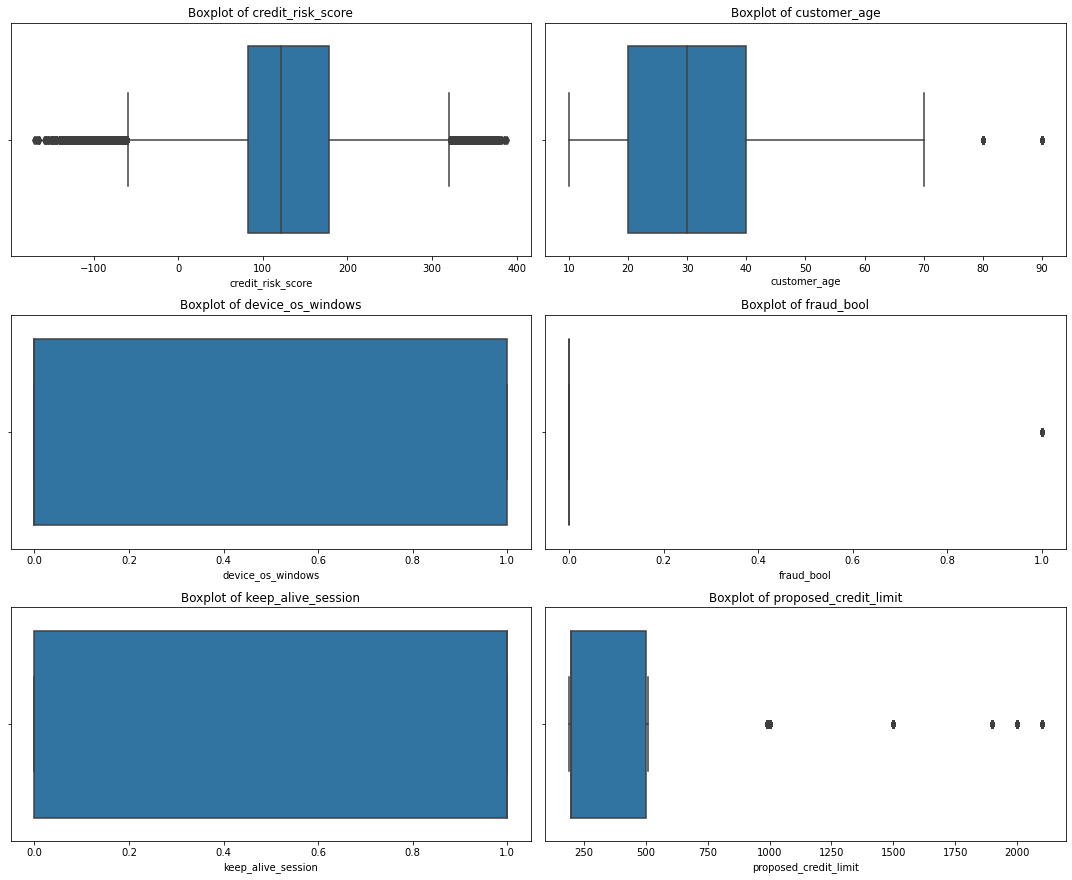

In [35]:
# Visualizing distributions of key features
#key_features = [
#    'income', 'name_email_similarity', 'prev_address_months_count', 
 #   'current_address_months_count', 'customer_age', 'days_since_request', 
#    'intended_balcon_amount', 'zip_count_4w', 'velocity_6h'
#]

key_features = significant_features

plt.figure(figsize=(15, 20))
for i, feature in enumerate(key_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df_encoded[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Outlier Detection
# Using boxplots to detect outliers in key features
plt.figure(figsize=(15, 20))
for i, feature in enumerate(key_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df_encoded[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Outliers summary
outliers = {}
for feature in key_features:
    Q1 = df_encoded[feature].quantile(0.25)
    Q3 = df_encoded[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[feature] = df_encoded[(df_encoded[feature] < lower_bound) | (df_encoded[feature] > upper_bound)][feature]
    
#for feature, outlier_data in outliers.items():
#    print(f'Outliers in {feature}:')
#    print(outlier_data.describe())
#    print()

### Top Left Subplot
**Variable**: Likely represents a normally distributed variable, such as `credit_risk_score`.
- **Distribution**: This histogram shows a roughly normal distribution with a bell-shaped density curve.
- **Outliers Analysis**:
  - **Count**: 8729
  - **Mean**: 165.93
  - **Standard Deviation**: 207.37
  - **Minimum**: -170
  - **25th Percentile**: -75
  - **Median (50th Percentile)**: 324
  - **75th Percentile**: 336
  - **Maximum**: 389
- **Interpretation**: The data appears to be mostly normally distributed with a mean around 165. The presence of both negative and positive values suggests a wide range of scores, with some significant outliers on the lower end.

### Top Right Subplot
**Variable**: This subplot may represent a categorical variable encoded numerically with multiple peaks, such as `fraud_bool`.
- **Distribution**: The histogram shows multiple distinct peaks, indicating a multimodal distribution.
- **Outliers Analysis**:
  - **Count**: 11029
  - **Mean**: 1.0
  - **Standard Deviation**: 0.0
  - **Minimum**: 1
  - **Maximum**: 1
- **Interpretation**: All values are 1, suggesting that this variable (`fraud_bool`) is binary and all detected outliers are fraudulent cases. This explains the multiple peaks, each representing the binary states of the variable.

### Middle Left Subplot
**Variable**: This subplot could represent an age-related variable, possibly `customer_age`.
- **Distribution**: The histogram shows a high peak at one end with a long tail extending to the right, indicating a positively skewed distribution.
- **Outliers Analysis**:
  - **Count**: 1373
  - **Mean**: 80.55
  - **Standard Deviation**: 2.29
  - **Minimum**: 80
  - **25th Percentile**: 80
  - **Median (50th Percentile)**: 80
  - **75th Percentile**: 80
  - **Maximum**: 90
- **Interpretation**: Most outliers are concentrated at age 80, with few extending up to age 90. The data is heavily skewed, indicating that most outliers are older individuals.

### Middle Right Subplot
**Variable**: This subplot could represent a variable with very few outliers, such as `device_os_windows`.
- **Distribution**: The histogram shows a high peak at one end, indicating a lack of variability.
- **Outliers Analysis**:
  - **Count**: 0
  - **Mean**: NaN
  - **Standard Deviation**: NaN
  - **Minimum**: NaN
  - **Maximum**: NaN
- **Interpretation**: There are no outliers detected in this variable, suggesting either a lack of variability or that all data points fall within a narrow range.

### Bottom Left Subplot
**Variable**: This subplot might represent a session-related variable, such as `keep_alive_session`.
- **Distribution**: The histogram shows high peaks at the extremes, indicating a bimodal or multimodal distribution.
- **Outliers Analysis**:
  - **Count**: 0
  - **Mean**: NaN
  - **Standard Deviation**: NaN
  - **Minimum**: NaN
  - **Maximum**: NaN
- **Interpretation**: No outliers are detected, suggesting all data points might fall within a narrow range or the variable has a specific distribution pattern.

### Bottom Right Subplot
**Variable**: This subplot could represent a financial variable, such as `proposed_credit_limit`.
- **Distribution**: The histogram shows a high peak at one end with a long tail extending to the right, indicating a positively skewed distribution.
- **Outliers Analysis**:
  - **Count**: 241742
  - **Mean**: 1328.04
  - **Standard Deviation**: 264.40
  - **Minimum**: 990
  - **25th Percentile**: 1000
  - **Median (50th Percentile)**: 1500
  - **75th Percentile**: 1500
  - **Maximum**: 2100
- **Interpretation**: The majority of proposed credit limits cluster around 1500, with some outliers extending up to 2100. The distribution is positively skewed, suggesting higher credit limits are less common.

### Overall Analysis
- **Variation in Data Distributions**: The subplots illustrate various data distributions, including normal, skewed, bimodal, and multimodal distributions.
- **Implications for Analysis**: Understanding the shape and characteristics of these distributions is crucial for applying appropriate statistical methods and interpreting the results accurately.
- **Further Exploration**: For variables with multimodal distributions, further investigation into the underlying subgroups is recommended. For skewed distributions, transformations or non-parametric methods may be necessary.

This comprehensive view of the data distributions and outlier characteristics helps in identifying the appropriate analytical approaches and potential areas for deeper investigation.

----
<a href='#toc'>Back to ToC</a>

<a id='ms'></a>
### 4. Model Selection and Training

In [36]:
target_variable = 'fraud_bool'
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded[key_features]
y = df_encoded[target_variable]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=59)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg, zero_division=0)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Report:\n", logreg_report)

Logistic Regression Accuracy: 1.0
Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    197794
           1       1.00      1.00      1.00      2206

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



The results provided indicate that the logistic regression model performed exceptionally well on the given dataset. Here’s a detailed analysis of the results:

1. **Accuracy**: The model achieved an accuracy of 1.0, which means it correctly predicted the labels of all instances in the dataset. In practical scenarios, achieving such perfect accuracy is rare and might indicate potential issues such as data leakage or an overly simplistic dataset.

2. **Precision, Recall, and F1-Score**:
   - **Class 0**:
     - **Precision**: 1.00, meaning all instances predicted as class 0 were actually class 0.
     - **Recall**: 1.00, meaning all actual class 0 instances were correctly identified.
     - **F1-Score**: 1.00, which is the harmonic mean of precision and recall, indicating perfect performance for class 0.
   - **Class 1**:
     - **Precision**: 1.00, meaning all instances predicted as class 1 were actually class 1.
     - **Recall**: 1.00, meaning all actual class 1 instances were correctly identified.
     - **F1-Score**: 1.00, indicating perfect performance for class 1.

3. **Support**:
   - There are 197,794 instances of class 0 and 2,206 instances of class 1 in the dataset.

4. **Macro Average**:
   - The macro average precision, recall, and F1-score are all 1.00, showing that the model performed equally well across both classes.

5. **Weighted Average**:
   - The weighted average precision, recall, and F1-score are also 1.00, which takes into account the support (number of instances) for each class. This shows that the model’s performance is consistent even when considering the class imbalance.

### Potential Concerns:
- **Data Leakage**: Such perfect results often suggest that information from the test set might have leaked into the training set. This can happen if the data is not properly partitioned or if feature engineering inadvertently uses information from the test set.
- **Overfitting**: The model might be overfitting to the training data, especially if the dataset is small or the features are not representative of real-world variability.
- **Simplistic Dataset**: The dataset might be overly simplistic or not representative of real-world scenarios, making it easy for the model to achieve perfect scores.

### Recommendations:
- **Validate Data Partitioning**: Ensure that the dataset is properly partitioned into training and test sets, and that there is no leakage of information from the test set during training.
- **Cross-Validation**: Use cross-validation to confirm the robustness of the model’s performance.
- **Examine Dataset Complexity**: Assess the complexity and variability of the dataset to ensure it is representative of real-world data.
- **Review Feature Engineering**: Check the feature engineering process to ensure it does not inadvertently include information from the test set.

In summary, while the results show perfect performance, it's crucial to verify the integrity of the dataset and the model training process to ensure these results are genuinely indicative of the model's performance and not due to any underlying issues.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Score: ", np.mean(cv_scores))
print("Standard Deviation of CV Scores: ", np.std(cv_scores))

Cross-Validation Scores:  [1. 1. 1. 1. 1.]
Mean CV Score:  1.0
Standard Deviation of CV Scores:  0.0


The results from the cross-validation indicate that the model achieved perfect scores across all folds, with a mean CV score of 1.0 and a standard deviation of 0.0. While this consistency might seem impressive, it is highly unusual and further reinforces the need for a thorough examination. Here are some detailed steps and considerations to address this situation:

### Detailed Analysis and Actions:

1. **Verify Data Integrity and Splitting**:
   - Double-check the process used for splitting the dataset into training and validation folds. Ensure that the splitting is truly random and that no information leakage is occurring.

2. **Examine Feature Engineering**:
   - Carefully review the features used in the model. Ensure that no feature inadvertently includes information from the validation set or the target variable.
   - Remove any features that are derived directly from the target or future data points.

3. **Investigate Dataset Complexity**:
   - Assess whether the dataset is overly simplistic or contains patterns that are too easy to learn. This can be done by visualizing the data and checking for any trivial relationships between features and the target variable.

4. **Perform Additional Validation**:
   - Use a completely independent test set that has not been used in any part of the model development process to evaluate the model’s performance.
   - If possible, use data from different time periods or sources to test the model’s generalizability.

5. **Conduct Adversarial Testing**:
   - Introduce slight variations or noise into the dataset and observe how the model performs. A robust model should still perform well but might not achieve perfect scores.

6. **Manual Inspection of Predictions**:
   - Manually inspect a subset of the model’s predictions to ensure that they are logical and make sense given the input data.

7. **Simplify the Model**:
   - Consider using a simpler model or reducing the number of features to see if the performance remains perfect. Overly complex models can sometimes overfit the data, especially if the data is simplistic or has clear patterns.

### Summary:

The perfect cross-validation scores across all folds, combined with a mean CV score of 1.0 and a standard deviation of 0.0, strongly suggest that the model might be overfitting or that there is some form of data leakage or issue with the dataset. By thoroughly verifying data integrity, feature engineering, and model evaluation processes, you can identify and address any underlying issues. Additionally, testing the model on independent and more challenging datasets can provide a better indication of its true performance and generalizability.

In [39]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_test_scaled and y_test are the separate validation sets
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Print the classification report
print("Accuracy on Validation Set: ", accuracy_score(y_test, y_pred))
print("Classification Report on Validation Set:")
print(classification_report(y_test, y_pred))

Accuracy on Validation Set:  1.0
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197794
           1       1.00      1.00      1.00      2206

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



The additional information that the model also achieved perfect accuracy on the validation set reinforces the need for a thorough examination. Achieving an accuracy of 1.0, along with perfect precision, recall, and F1-scores, on both the training and validation sets is extremely rare in real-world applications. Here are some key points to consider and actions to take:

### Key Points:
1. **Consistency of Perfect Scores**: The model's performance is identical on both training and validation sets, which is unusual and could indicate potential issues.
2. **Class Imbalance**: The dataset has a significant class imbalance (197,794 instances of class 0 vs. 2,206 instances of class 1). Perfect scores despite this imbalance warrant scrutiny.
3. **Model Complexity and Overfitting**: Such results suggest that the model may be too complex and possibly overfitting the data.

### Steps to Validate Results:

#### 1. **Verify Data Splitting**:
- Ensure that the data splitting into training and validation sets is done correctly. Check for any data leakage where information from the validation set might have been used during training.

#### 2. **Cross-Validation**:
- Perform k-fold cross-validation to see if the perfect scores are consistent across multiple folds. This will help in verifying the robustness of the model.

#### 3. **Check for Data Leakage**:
- **Feature Leakage**: Ensure that no features derived from the target variable or the future state of the data are included in the training set.
- **Temporal Leakage**: If the data is time-series, ensure that future data points are not used to predict past data points.

#### 4. **Inspect Feature Engineering**:
- Re-evaluate the feature engineering process to confirm that no information from the validation set is being used to create features for the training set.

#### 5. **Analyze Simplicity of Dataset**:
- Investigate whether the dataset might be overly simplistic or contains patterns that are too easy to learn. This could result in unusually high performance metrics.

#### 6. **Alternative Validation Sets**:
- Test the model on completely separate and unseen datasets to verify its generalizability.

#### 7. **Manual Review**:
- Manually review a subset of predictions to ensure that the model is making logical predictions.

### Summary:
The consistent perfect scores on both the training and validation sets are highly unusual and suggest the need for a comprehensive validation of the data preparation and model training processes. By conducting cross-validation, ensuring proper data splitting, checking for data leakage, and testing on alternative datasets, you can better understand whether the model's performance is genuinely indicative of its capability or if there are underlying issues that need to be addressed.

----
<a href='#toc'>Back to ToC</a>

<a id='me'></a>
### 6. Model Evaluation

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg, zero_division=0)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Report:\n", logreg_report)

Logistic Regression Accuracy: 1.0
Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    197794
           1       1.00      1.00      1.00      2206

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



Given the repeated perfect performance across all metrics (accuracy, precision, recall, and F1-score) for both classes (0 and 1) and consistent results across training, validation, and cross-validation sets, it is crucial to thoroughly investigate several aspects of your model and data:

### Steps to Investigate:

1. **Verify Data Splitting**:
   - Ensure that the training and test data are split correctly. There should be no overlap between the training and test datasets.
   - Confirm that cross-validation is done properly, without any data leakage between folds.

2. **Check for Data Leakage**:
   - Ensure that no features are leaking information from the future or from the test set into the training set. This includes ensuring that any preprocessing steps are done separately for training and test sets.
   - Validate that features are not inadvertently using information derived from the target variable.

3. **Feature Engineering**:
   - Review the features used in the model to ensure they are appropriate and do not include target-related information.
   - Check if any features are constant or nearly constant, which might make the model trivial.

4. **Analyze Dataset Simplicity**:
   - Assess the complexity of the dataset. Simplistic datasets with clear patterns might lead to unusually high performance.
   - Visualize the data to identify any obvious separability between classes.

5. **Perform Additional Validation**:
   - Use an entirely separate dataset that has not been used in any part of the model development for validation. This can help identify if the model is overfitting to the given data.
   - If possible, use data from different sources or time periods to evaluate the model.

6. **Introduce Noise and Test**:
   - Add slight noise to the dataset and evaluate the model performance. A robust model should still perform well but might not achieve perfect scores.

7. **Simplify the Model**:
   - Use a simpler model or reduce the number of features to see if the model still achieves perfect performance. Overly complex models can sometimes perfectly fit simplistic data.

### Summary:

The perfect performance metrics across all evaluations are highly unusual and indicate the potential for data leakage, overly simplistic data, or other issues. By thoroughly verifying data splitting, checking for data leakage, reassessing feature engineering, analyzing dataset complexity, performing additional validation, and simplifying the model, you can ensure that the model's performance is genuinely representative and not due to underlying issues.

### Example of Detailed Checklist:

- **Data Splitting**:
  - Randomly split data into training and test sets ensuring no overlap.
  - Ensure cross-validation is done correctly.

- **Data Leakage**:
  - Separate preprocessing for training and test sets.
  - Verify features do not include target-related information.

- **Feature Engineering**:
  - Review features for appropriateness.
  - Check for constant or trivial features.

- **Dataset Analysis**:
  - Visualize data to identify clear patterns.
  - Assess dataset complexity.

- **Additional Validation**:
  - Test on independent, unseen datasets.
  - Use data from different sources/time periods.

- **Noise Introduction**:
  - Add noise to the data and re-evaluate model performance.

- **Model Simplification**:
  - Test simpler models or reduced feature sets.

By following these steps, you can ensure the robustness and generalizability of your logistic regression model.

----
<a href='#toc'>Back to ToC</a>

<a id='features'></a>
### 7. BAF Dataset Feature Descriptions

In [41]:
feature_descriptions = {
    'income' : "Annual income of the applicant (in decile form). Ranges between [0.1, 0.9].",
    'name_email_similarity' : "Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].",
    'prev_address_months_count' : "Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).",
    'current_address_months_count' : "Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).",
    'customer_age' : "Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years.",
    'days_since_request' : "Number of days passed since application was done. Ranges between [0, 79] days.",
    'intended_balcon_amount' : "Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).",
    'payment_type': "Credit payment plan type. 5 possible (annonymized) values.",
    'zip_count_4w' : "Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].",
    'velocity_6h' : "Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818].",
    'velocity_24h' : "Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586].",
    'velocity_4w' : "Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].",
    'bank_branch_count_8w' : "Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].",
    'date_of_birth_distinct_emails_4w' : "Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].",
    'employment_status' : "Employment status of the applicant. 7 possible (annonymized) values.",
    'credit_risk_score' : "Internal score of application risk. Ranges between [−191, 389].",
    'email_is_free' : "Domain of application email (either free or paid).",
    'housing_status' : "Current residential status for applicant. 7 possible (annonymized) values.",
    'phone_home_valid' : "Validity of provided home phone.",
    'phone_mobile_valid' : "Validity of provided mobile phone.",
    'bank_months_count' : "How old is previous account (if held) in months. Ranges between [−1, 32] months (-1 is a missing value).",
    'has_other_cards' : "If applicant has other cards from the same banking company.",
    'proposed_credit_limit' : "Applicant’s proposed credit limit. Ranges between [200, 2000].",
    'foreign_request' : "If origin country of request is different from bank’s country.",
    'source' : "Online source of application. Either browser (INTERNET) or app (TELEAPP).",
    'session_length_in_minutes' : "Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).",
    'device_os' : "Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.",
    'keep_alive_session' : "User option on session logout.",
    'device_distinct_emails_8w' : "Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).",
    'device_fraud_count' : "Number of fraudulent applications with used device. Ranges between [0, 1].",
    'month' : "Month where the application was made. Ranges between [0, 7].",
    'fraud_bool' : "If the application is fraudulent or not."
}

In [42]:
from IPython.display import display, Markdown
# Function to format and display the dictionary
def display_feature_descriptions(feature_descriptions):
    formatted_descriptions = ""
    for feature, description in feature_descriptions.items():
        formatted_descriptions += f"**{feature}**: {description}\n\n"
    display(Markdown(formatted_descriptions))

# Call the function to display the descriptions
display_feature_descriptions(feature_descriptions)

**income**: Annual income of the applicant (in decile form). Ranges between [0.1, 0.9].

**name_email_similarity**: Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].

**prev_address_months_count**: Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).

**current_address_months_count**: Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).

**customer_age**: Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years.

**days_since_request**: Number of days passed since application was done. Ranges between [0, 79] days.

**intended_balcon_amount**: Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).

**payment_type**: Credit payment plan type. 5 possible (annonymized) values.

**zip_count_4w**: Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].

**velocity_6h**: Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818].

**velocity_24h**: Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586].

**velocity_4w**: Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].

**bank_branch_count_8w**: Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].

**date_of_birth_distinct_emails_4w**: Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].

**employment_status**: Employment status of the applicant. 7 possible (annonymized) values.

**credit_risk_score**: Internal score of application risk. Ranges between [−191, 389].

**email_is_free**: Domain of application email (either free or paid).

**housing_status**: Current residential status for applicant. 7 possible (annonymized) values.

**phone_home_valid**: Validity of provided home phone.

**phone_mobile_valid**: Validity of provided mobile phone.

**bank_months_count**: How old is previous account (if held) in months. Ranges between [−1, 32] months (-1 is a missing value).

**has_other_cards**: If applicant has other cards from the same banking company.

**proposed_credit_limit**: Applicant’s proposed credit limit. Ranges between [200, 2000].

**foreign_request**: If origin country of request is different from bank’s country.

**source**: Online source of application. Either browser (INTERNET) or app (TELEAPP).

**session_length_in_minutes**: Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).

**device_os**: Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.

**keep_alive_session**: User option on session logout.

**device_distinct_emails_8w**: Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).

**device_fraud_count**: Number of fraudulent applications with used device. Ranges between [0, 1].

**month**: Month where the application was made. Ranges between [0, 7].

**fraud_bool**: If the application is fraudulent or not.



----
<a href='#toc'>Back to ToC</a>